In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime
 s
from config import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [2]:
target_terms = ("BBC", "CBS", "CNN",
                "FoxNews", "nytimes")

In [3]:
sentiments_full = []

counter = 1

In [5]:
for target in target_terms:

    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    for x in range(5):

        public_tweets = api.user_timeline(target, page=x)
   
        for tweet in public_tweets:
      
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)


            # Add sentiments for each tweet into an array
            sentiments_full.append({"User": target, 
                           "Source account": tweet["source"],
                           "Date": tweet["created_at"],        
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            
            # Add to counter 
            counter = counter + 1
    
    

print(sentiments_full)
print("")

[{'User': 'BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Sun Oct 14 19:04:04 +0000 2018', 'Text': '😂💍 Why rings for fingers... are just called "rings."  \n#LiveAtTheApollo https://t.co/3lbEQ2iLaS', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 1}, {'User': 'BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Sun Oct 14 18:07:08 +0000 2018', 'Text': "🥑😲 Bad news, millennials... avocados AREN'T vegan!  \n#QI https://t.co/Ne4D8MGcYi", 'Compound': -0.5848, 'Positive': 0.0, 'Negative': 0.678, 'Neutral': 0.322, 'Tweets Ago': 2}, {'User': 'BBC', 'Source account': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'Date': 'Sun Oct 14 17:07:06 +0000 2018', 'Text': 'At least 449 homeless people have died in the UK during the last 12 months, an investigation has found.\n👉… https://t.co/hPsvl8BHZD', 'Compound': -0.5574, 'Positive': 0.0, 'Neg

In [6]:
sentiments_df = pd.DataFrame.from_dict(sentiments_full)
sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago,User
0,0.0000,Sun Oct 14 19:04:04 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","😂💍 Why rings for fingers... are just called ""r...",1,BBC
1,-0.5848,Sun Oct 14 18:07:08 +0000 2018,0.678,0.322,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","🥑😲 Bad news, millennials... avocados AREN'T ve...",2,BBC
2,-0.5574,Sun Oct 14 17:07:06 +0000 2018,0.847,0.153,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",At least 449 homeless people have died in the ...,3,BBC
3,-0.2960,Sun Oct 14 15:59:03 +0000 2018,0.612,0.224,0.163,"<a href=""http://www.socialflow.com"" rel=""nofol...",Dan's cancer journey inspired MILLIONS.\n\n❤️ ...,4,BBC
4,0.0000,Sun Oct 14 15:29:07 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",😍 Princess Eugenie and Jack Brooksbank have re...,5,BBC


In [7]:
sentiments_df= sentiments_df.set_index("User")
sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago
User,,,,,,,,
BBC,0.0000,Sun Oct 14 19:04:04 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","😂💍 Why rings for fingers... are just called ""r...",1
BBC,-0.5848,Sun Oct 14 18:07:08 +0000 2018,0.678,0.322,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","🥑😲 Bad news, millennials... avocados AREN'T ve...",2
BBC,-0.5574,Sun Oct 14 17:07:06 +0000 2018,0.847,0.153,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",At least 449 homeless people have died in the ...,3
BBC,-0.2960,Sun Oct 14 15:59:03 +0000 2018,0.612,0.224,0.163,"<a href=""http://www.socialflow.com"" rel=""nofol...",Dan's cancer journey inspired MILLIONS.\n\n❤️ ...,4
BBC,0.0000,Sun Oct 14 15:29:07 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",😍 Princess Eugenie and Jack Brooksbank have re...,5


In [10]:
sentiments_df.to_csv("Resources/news_sent_analysis.csv", encoding="utf-8", index=False)

In [14]:
BBC = sentiments_df.loc["BBC", "Compound"]
CBS = sentiments_df.loc["CBS", "Compound"] 
CNN = sentiments_df.loc["CNN", "Compound"] 
Fox = sentiments_df.loc["FoxNews", "Compound"] 
nytimes = sentiments_df.loc["nytimes", "Compound"] 
BBC =BBC.reset_index()
CBS =CBS.reset_index()
CNN =CNN.reset_index()
Fox =Fox.reset_index()
nytimes =nytimes.reset_index()

In [15]:
Compound_df=pd.concat([BBC, CBS, CNN, Fox,nytimes],axis=1)
Compound_df
Compound_df.columns.values[1] = 'BBC Compound' 
Compound_df.columns.values[3] = 'CBS Compound'
Compound_df.columns.values[5] = 'CNN Compound'
Compound_df.columns.values[7] = 'FoxNews Compound'
Compound_df.columns.values[9] = 'NYtimes Compound'
Compound_df.head()

,User,BBC Compound,User,CBS Compound,User,CNN Compound,User,FoxNews Compound,User,NYtimes Compound
0,BBC,0.0000,CBS,0.5562,CNN,0.0000,FoxNews,0.0000,nytimes,0.0000
1,BBC,-0.5848,CBS,0.0000,CNN,-0.5994,FoxNews,0.5423,nytimes,0.0900
2,BBC,-0.5574,CBS,0.0000,CNN,-0.2960,FoxNews,0.0000,nytimes,-0.4939
3,BBC,-0.2960,CBS,0.4466,CNN,0.0000,FoxNews,0.4215,nytimes,-0.0516
4,BBC,0.0000,CBS,0.7579,CNN,0.0000,FoxNews,0.4215,nytimes,-0.5994


C:\Users\wgdav\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\matplotlib\legend.py:938: UserWarning: Legend does not support    User  Compound
0   BBC    0.0000
1   BBC   -0.5848
2   BBC   -0.5574
3   BBC   -0.2960
4   BBC    0.0000
5   BBC    0.5848
6   BBC    0.0000
7   BBC   -0.4767
8   BBC    0.5707
9   BBC    0.4215
10  BBC    0.3818
11  BBC    0.6705
12  BBC    0.4404
13  BBC    0.6369
14  BBC    0.4939
15  BBC    0.0000
16  BBC    0.0000
17  BBC   -0.4588
18  BBC    0.0000
19  BBC    0.0000
20  BBC    0.0000
21  BBC   -0.5848
22  BBC   -0.5574
23  BBC   -0.2960
24  BBC    0.0000
25  BBC    0.5848
26  BBC    0.0000
27  BBC   -0.4767
28  BBC    0.5707
29  BBC    0.4215
..  ...       ...
70  BBC    0.2263
71  BBC    0.4767
72  BBC    0.4003
73  BBC    0.1027
74  BBC    0.0000
75  BBC   -0.5423
76  BBC    0.4404
77  BBC    0.4588
78  BBC    0.6908
79  BBC    0.6249
80  BBC   -0.0094
81  BBC    0.6808
82  BBC    0.0000
83  BBC    0.0000
84  BBC    0.0000
85  BBC   -0.234

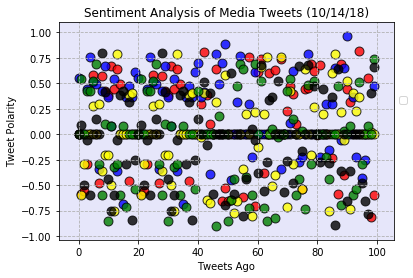

In [22]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_facecolor('lavender')
BBC_C = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["BBC Compound"], marker="o", color="red", edgecolors="k",
         alpha=0.8, s=80 ) 
CBS_C = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CBS Compound"], marker="o", color="blue", edgecolors="k",
         alpha=0.8,s=80)
CNN_C = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CNN Compound"], marker="o", color="yellow", edgecolors="k",
         alpha=0.8 ,s=80)
Fox_C = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["FoxNews Compound"], marker="o", color="green", edgecolors="k",
         alpha=0.8,s=80)
nytimes_C = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["NYtimes Compound"], marker="o", color="black", edgecolors="k",
         alpha=0.8,s=80)
# # Incorporate the other graph properties

plt.title("Sentiment Analysis of Media Tweets (10/14/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True, linestyle='dashed')
plt.legend((BBC, CBS, CNN, Fox, nytimes), ("BBC Compound","CBS Compound","CNN Compound","FoxNews Compound","NYtimes Compound"),
           loc='lower left',
           bbox_to_anchor=(1, 0.6))
plt.savefig("Images/Sent_Analysis_News_Tweets_10_14")     
plt.show()

In [20]:
avg_BBC = Compound_df["BBC Compound"].mean()
avg_CBS = Compound_df["CBS Compound"].mean()
avg_CNN = Compound_df["CNN Compound"].mean()
avg_Fox = Compound_df["FoxNews Compound"].mean()
avg_nytimes = Compound_df["NYtimes Compound"].mean()

avg = {'Compound': pd.Series([avg_BBC, avg_CBS, avg_CNN, avg_Fox, avg_nytimes],index=['BBC','CBS','CNN','FoxNews','NYtimes'] )}
Compound_mean_df = pd.DataFrame(avg)
Compound_mean_df=Compound_mean_df.reset_index()
Compound_mean_df

,index,Compound
0,BBC,0.101595
1,CBS,0.188507
2,CNN,-0.016445
3,FoxNews,-0.068695
4,NYtimes,-0.063482


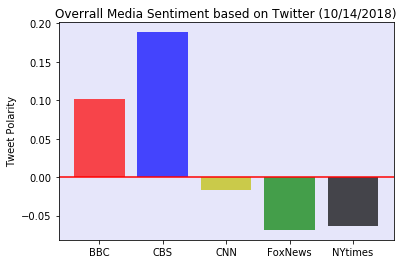

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis = np.arange(0, len(Compound_mean_df["index"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
ax.bar(x_axis, Compound_mean_df["Compound"], alpha=0.70, color="rbygk", align="edge")    

ax.set_ylabel('Tweet Polarity')
ax.set_title("Overrall Media Sentiment based on Twitter (10/14/2018)")
ax.set_facecolor('lavender')
plt.xticks(tick_locations, Compound_mean_df["index"])
plt.axhline(0, color='r')
plt.savefig("Images/Overall_News_Sentiment_Twitter_10_14")
plt.show()

In [ ]:
#Analysis
#Observed  1: On October 14, 2018, overall sentiment polarity is positive for BBC and CBS tweets emotion and a negative reaction for FoxNews, & NYTimes. CNN is close to neutral 
#Observed  2: Overall, CBS is most positive at 18% and BBC is the second most positive with 10%
#Observed  3: The results also FoxNews & NYtimes are tied with a slight over -5% negative polarity.